In [1]:
import turicreate as tc

In [2]:
image_train = tc.SFrame('image_train_data/')
image_test = tc.SFrame('image_test_data/')

In [3]:
image_train

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


In [9]:
raw_pixel_model = tc.logistic_classifier.create(image_train,target = 'label',features = ['image_array'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 3072

Number of coefficients      : 9219

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.017951  | 0.208226     | 0.287290          | 0.207921            |

| 1         | 10       | 1.525843  | 0.471973     | 0.360294          | 0.297030            |

| 2         | 12       | 1.525843  | 0.593230     | 0.393908          | 0.386139            |

| 3         | 19       | 0.275635  | 0.901980     | 0.434874          | 0.425743            |

| 4         | 20       | 0.344543  | 0.995944     | 0.439601          | 0.425743            |

| 9         | 32       | 1.093678  | 1.663793     | 0.516282          | 0.485149            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

,SArray
0,
1,
2,

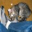
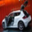
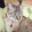

In [11]:
image_test[0:3]['image'].explore()

In [13]:
image_test[0:3]['label']

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

In [15]:
raw_pixel_model.predict(image_test[0:3])

dtype: str
Rows: 3
['bird', 'cat', 'bird']

In [16]:
raw_pixel_model.evaluate(image_test)

{'accuracy': 0.46975,
 'auc': 0.7209265416666668,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     dog      |    automobile   |   96  |
 |     bird     |       dog       |  231  |
 |     dog      |       cat       |  235  |
 |     dog      |       bird      |  214  |
 |     cat      |    automobile   |  154  |
 |     cat      |       cat       |  340  |
 |     dog      |       dog       |  455  |
 |     cat      |       dog       |  329  |
 |     bird     |    automobile   |  132  |
 |  automobile  |    automobile   |  618  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.46919814339631577,
 'log_loss': 1.2103719965199353,
 'precisi

In [17]:
len(image_train)

2005

In [4]:
deep_features_model = tc.logistic_classifier.create(image_train, target='label',  features = ['deep_features'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 4096

Number of coefficients      : 12291

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 0.500000  | 1.222179     | 0.731092          | 0.712871            |

| 1         | 6        | 0.250000  | 1.527927     | 0.764706          | 0.752475            |

| 2         | 13       | 3.605885  | 2.079661     | 0.783088          | 0.762376            |

| 3         | 15       | 3.376789  | 2.315300     | 0.127626          | 0.128713            |

| 4         | 17       | 1.000000  | 2.565422     | 0.691176          | 0.603960            |

| 9         | 24       | 1.000000  | 3.557317     | 0.951681          | 0.801980            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

,SArray
0,
1,
2,

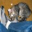
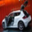
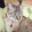

In [5]:
image_test[0:3]['image'].explore()

In [7]:
deep_features_model.predict(image_test[0:3])

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

In [8]:
deep_features_model.evaluate(image_test)

{'accuracy': 0.79175,
 'auc': 0.9401202083333334,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     bird     |       cat       |  112  |
 |     bird     |       dog       |   66  |
 |     dog      |       cat       |  178  |
 |     cat      |       bird      |   78  |
 |  automobile  |       dog       |   11  |
 |     cat      |    automobile   |   21  |
 |     dog      |       bird      |   54  |
 |  automobile  |       cat       |   14  |
 |     dog      |    automobile   |   8   |
 |     bird     |    automobile   |   10  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.791830582230496,
 'log_loss': 0.6970799367579448,
 'precision